## **AI Data Analysis**

Possible Models to test:
- Moving Average Time Series Model
- Autoregressive Model

Features: Group_Name, group_id, time_sequnece

### **DataFrame**
Grabs the training and testing dataset from google drive

In [2]:
import pandas as pd
training_url = 'https://drive.google.com/file/d/1uVq3dwf4CKwLd5U0Y8uMOjxkjjXmXfvO/view?usp=sharing'
testing_url='https://drive.google.com/file/d/1tELkS1DEUddnpKkguctOj6t8LvgJYDIz/view?usp=sharing'
training_file_id=training_url.split('/')[-2]
testing_file_id = testing_url.split('/')[-2]
teest_dwn_url='https://drive.google.com/uc?id=' + testing_file_id
train_dwn_url = 'https://drive.google.com/uc?id=' + training_file_id
training_dataset = pd.read_csv(train_dwn_url)
testing_dataset = pd.read_csv(train_dwn_url)
print(training_dataset.head())
print(testing_dataset.head())

   group_id          arrive_time          depart_time  Fleet_Number   
0    2375.0  2023-05-15 07:35:09  2023-05-15 07:35:49           934  \
1    1505.0  2023-05-15 07:37:54  2023-05-15 07:39:15           934   
2    2375.0  2023-05-15 07:53:50  2023-05-15 07:55:10           934   
3    1505.0  2023-05-15 07:57:12  2023-05-15 07:58:15           934   
4    2375.0  2023-05-15 08:24:28  2023-05-15 08:24:48           934   

   Timepoint  Time Difference Type Time      Group_Name dayofweek   
0          1  0 days 00:03:26    depart  bayhi_to_oakes         M  \
1          1  0 days 00:03:26    depart  bayhi_to_oakes         M   
2          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
3          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
4          1  0 days 00:02:40    depart  bayhi_to_oakes         M   

              Sequence  
0  05:00:00 - 07:45:00  
1  05:00:00 - 07:45:00  
2  07:50:00 - 07:55:00  
3  07:55:00 - 08:00:00  
4  08:05:00 - 09:00:00  
   group

### **Filter Data**
- Filter the data so data vizualization makes sense

In [58]:
#---- Filtered Training Data ----
filtered_training_data = training_dataset[training_dataset["dayofweek"].apply(lambda x: x in "MWF")]
#filtered_training_data = filtered_training_data[filtered_training_data["Sequence"] == "05:00:00 - 07:45:00"]
filtered_training_data = filtered_training_data[filtered_training_data["Type Time"].apply(lambda x : x in "depart")]
filtered_training_data = filtered_training_data[filtered_training_data["arrive_time"].apply(lambda x: x.split("-")[1] in ["05", "04"])]
filtered_training_data = filtered_training_data[filtered_training_data["depart_time"].apply(lambda x: x.split("-")[1] in ["05", "04"])]
filtered_training_data["arrive_time"] = pd.to_datetime(filtered_training_data["arrive_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
filtered_training_data["depart_time"] = pd.to_datetime(filtered_training_data["depart_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))

#filtered_training_data["arrive_time"].apply(lambda x: x.replace(year=1990, month=1, day=1))
# arrivaldataFrame = pandas.to_datetime(timesubset["arrive_time"], format="%Y-%m-%d %H:%M:%S")
#filtered_training_data = filtered_training_data.loc[filtered_training_data["group_id"] == 2375.0]
filtered_training_data.to_csv("G:\\My Drive\\Fall 2023\\TIM 147\\Bus-Data-Project\\output_train.csv", index=False, header=True)
print("Filter train", filtered_training_data)

Filter train        group_id         arrive_time         depart_time  Fleet_Number   
0        2375.0 1990-01-01 07:35:09 1990-01-01 07:35:49           934  \
1        1505.0 1990-01-01 07:37:54 1990-01-01 07:39:15           934   
2        2375.0 1990-01-01 07:53:50 1990-01-01 07:55:10           934   
3        1505.0 1990-01-01 07:57:12 1990-01-01 07:58:15           934   
4        2375.0 1990-01-01 08:24:28 1990-01-01 08:24:48           934   
...         ...                 ...                 ...           ...   
22412    1505.0 1990-01-01 13:45:00 1990-01-01 13:46:00           935   
22414    1505.0 1990-01-01 14:28:08 1990-01-01 14:29:10           935   
22416    1505.0 1990-01-01 14:50:05 1990-01-01 14:50:46           935   
22446    1341.0 1990-01-01 12:34:40 1990-01-01 12:45:59           934   
22464     201.0 1990-01-01 13:14:57 1990-01-01 13:16:53           934   

       Timepoint  Time Difference Type Time      Group_Name dayofweek   
0              1  0 days 00:03:26    

### **Data Visualization**
- Vizusalize the data with group name and time

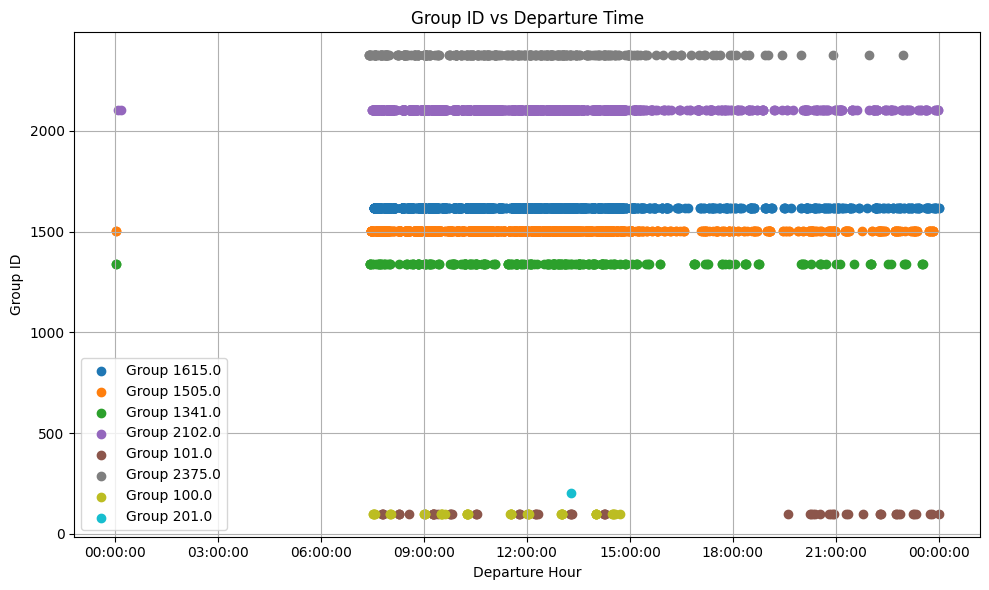

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x = filtered_training_data["group_id"]
y = pd.to_datetime(filtered_training_data["depart_time"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#print(y)
unique_group_ids = x_train.unique()
colors = plt.cm.get_cmap('tab10', len(unique_group_ids))  # Use a colormap for distinct colors

# Create a scatter plot with different colors for each group_id
plt.figure(figsize=(10, 6))  # Set the figure size
for i, group_id in enumerate(unique_group_ids):
    group_y = y_train[x_train == group_id]
    group_x = x_train[x_train == group_id]
    plt.scatter(group_y, group_x, marker='o', label=f'Group {group_id}', color=colors(i))

plt.xlabel('Departure Hour')
plt.ylabel('Group ID')
plt.title('Group ID vs Departure Time')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

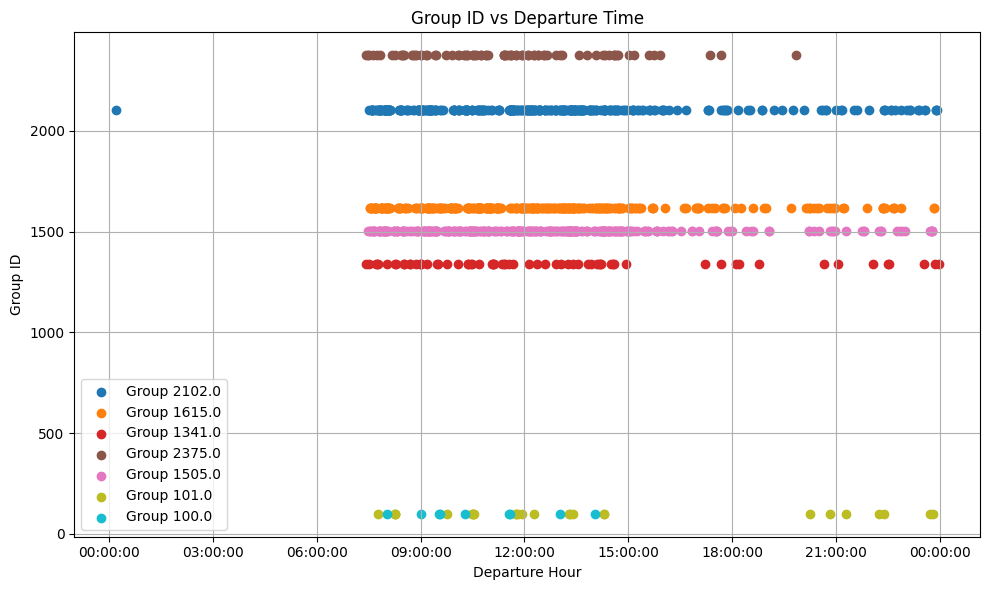

In [60]:
unique_group_ids = x_test.unique()
colors = plt.cm.get_cmap('tab10', len(unique_group_ids))  # Use a colormap for distinct colors

# Create a scatter plot with different colors for each group_id
plt.figure(figsize=(10, 6))  # Set the figure size
for i, group_id in enumerate(unique_group_ids):
    group_y = y_test[x_test == group_id]
    group_x = x_test[x_test == group_id]
    plt.scatter(group_y, group_x, marker='o', label=f'Group {group_id}', color=colors(i))

plt.xlabel('Departure Hour')
plt.ylabel('Group ID')
plt.title('Group ID vs Departure Time')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **Auto Regressive Integrated Moving Average Model**

C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

                               SARIMAX Results                                
Dep. Variable:               group_id   No. Observations:                 4705
Model:                 ARIMA(5, 2, 1)   Log Likelihood              -35201.771
Date:                Fri, 01 Dec 2023   AIC                          70417.542
Time:                        13:15:43   BIC                          70462.734
Sample:                             0   HQIC                         70433.430
                               - 4705                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8089      0.014    -58.252      0.000      -0.836      -0.782
ar.L2         -0.6697      0.017    -38.509      0.000      -0.704      -0.636
ar.L3         -0.4945      0.019    -25.907      0.0

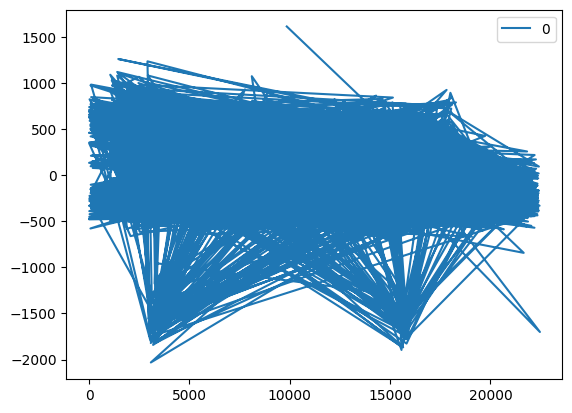

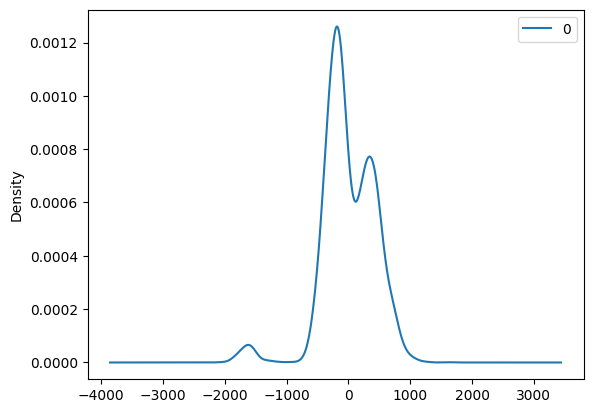

                 0
count  4705.000000
mean     -1.009123
std     431.795746
min   -2031.839579
25%    -245.616338
50%     -55.742886
75%     320.544781
max    1615.000000


In [61]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
model = ARIMA(x_train, order=(5,2,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Evalualte Model

In [63]:
import datetime
output = model_fit.forecast(steps = len(x_test))
print(type(output))

timedelta_values = [datetime.timedelta(seconds=value) for value in output]

# Assuming a starting time or reference point (adjust as needed)
start_time = datetime.datetime(1990, 1, 1)  # Replace with your start time

# Calculate the timestamps based on the starting time
predicted_times = [start_time + timedelta for timedelta in timedelta_values]

# Convert the timestamps to strings in a readable format
predicted_time_strings = [time.strftime("%Y-%m-%d %H:%M:%S") for time in predicted_times]

# Print the converted readable time strings
for time_string in predicted_time_strings:
    print("Predicted Time:", time_string)

<class 'pandas.core.series.Series'>
Predicted Time: 1990-01-01 00:28:47
Predicted Time: 1990-01-01 00:27:32
Predicted Time: 1990-01-01 00:27:43
Predicted Time: 1990-01-01 00:28:56
Predicted Time: 1990-01-01 00:27:49
Predicted Time: 1990-01-01 00:27:54
Predicted Time: 1990-01-01 00:28:09
Predicted Time: 1990-01-01 00:28:00
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:10
Predicted Time: 1990-01-01 00:28:01
Predicted Time: 1990-01-01 00:28:03
Predicted Time: 1990-01-01 00:28:05
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:05
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 00:28:04
Predicted Time: 1990-01-01 0

C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
